In [1]:
import pandas as pd
import numpy as np
import os
os.environ["JAVA_HOME"] = "/Library/Java/JavaVirtualMachines/adoptopenjdk-8.jdk/Contents/Home"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
import json
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from sparknlp.annotator import *
from sparknlp.base import *
import sparknlp
from sparknlp.pretrained import PretrainedPipeline
import collections
import matplotlib.pyplot as plt

In [2]:
spark = sparknlp.start()

In [3]:
MODEL_NAME='classifierdl_use_emotion'

In [4]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")
    
use = UniversalSentenceEncoder.pretrained(name="tfhub_use", lang="en")\
 .setInputCols(["document"])\
 .setOutputCol("sentence_embeddings")


sentimentdl = ClassifierDLModel.pretrained(name=MODEL_NAME)\
    .setInputCols(["sentence_embeddings"])\
    .setOutputCol("sentiment")

nlpPipeline = Pipeline(
      stages = [
          documentAssembler,
          use,
          sentimentdl
      ])


tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[OK!]


In [5]:
def predict_emotion(text_list):
    empty_df = spark.createDataFrame([['']]).toDF("text")
    pipelineModel = nlpPipeline.fit(empty_df)
    df = spark.createDataFrame(pd.DataFrame({"text":text_list}))
    result = pipelineModel.transform(df)
#     result.select(F.explode(F.arrays_zip('document.result', 'sentiment.result')).alias("cols")) \
#     .select(F.expr("cols['0']").alias("document"),
#         F.expr("cols['1']").alias("sentiment")).show(truncate=False)
    #Getting a list of emotions
    emotions = []
    for i in result.select(F.collect_list('sentiment')).first()[0]:
        emotions.append(str(i[0].result))

    #Getting a count of the emotions
    
    counter=collections.Counter(emotions)
    print(counter)
    #Visualisation
    labels, values = zip(*counter.items())

    indexes = np.arange(len(labels))
    width = 1
    import matplotlib.pyplot as plt
    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5, labels)
    if(len(text_list)%10==0):
        plt.show()

    

Counter({'fear': 1})
Counter({'fear': 1, 'joy': 1})
Counter({'fear': 1, 'joy': 1, 'surprise': 1})
Counter({'joy': 2, 'fear': 1, 'surprise': 1})
Counter({'joy': 2, 'surprise': 2, 'fear': 1})
Counter({'surprise': 3, 'joy': 2, 'fear': 1})
Counter({'joy': 3, 'surprise': 3, 'fear': 1})
Counter({'joy': 4, 'surprise': 3, 'fear': 1})
Counter({'joy': 5, 'surprise': 3, 'fear': 1})
Counter({'joy': 6, 'surprise': 3, 'fear': 1})


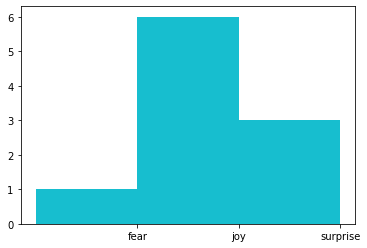

Counter({'joy': 7, 'surprise': 3, 'fear': 1})
Counter({'joy': 8, 'surprise': 3, 'fear': 1})
Counter({'joy': 9, 'surprise': 3, 'fear': 1})
Counter({'joy': 10, 'surprise': 3, 'fear': 1})
Counter({'joy': 11, 'surprise': 3, 'fear': 1})
Counter({'joy': 12, 'surprise': 3, 'fear': 1})
Counter({'joy': 12, 'surprise': 4, 'fear': 1})
Counter({'joy': 12, 'surprise': 4, 'fear': 1, 'sadness': 1})
Counter({'joy': 12, 'surprise': 5, 'fear': 1, 'sadness': 1})
Counter({'joy': 13, 'surprise': 5, 'fear': 1, 'sadness': 1})


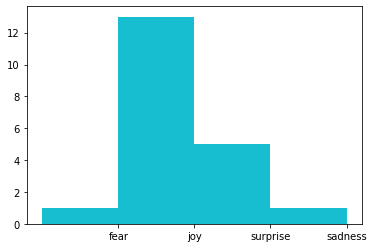

Counter({'joy': 14, 'surprise': 5, 'fear': 1, 'sadness': 1})
Counter({'joy': 14, 'surprise': 5, 'fear': 2, 'sadness': 1})
Counter({'joy': 15, 'surprise': 5, 'fear': 2, 'sadness': 1})
Counter({'joy': 15, 'surprise': 5, 'fear': 2, 'sadness': 2})
Counter({'joy': 16, 'surprise': 5, 'fear': 2, 'sadness': 2})
Counter({'joy': 16, 'surprise': 5, 'sadness': 3, 'fear': 2})
Counter({'joy': 17, 'surprise': 5, 'sadness': 3, 'fear': 2})
Counter({'joy': 18, 'surprise': 5, 'sadness': 3, 'fear': 2})
Counter({'joy': 19, 'surprise': 5, 'sadness': 3, 'fear': 2})
Counter({'joy': 19, 'surprise': 5, 'sadness': 4, 'fear': 2})


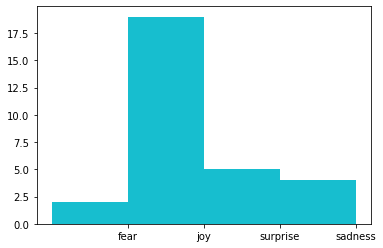

Counter({'joy': 20, 'surprise': 5, 'sadness': 4, 'fear': 2})
Counter({'joy': 20, 'surprise': 6, 'sadness': 4, 'fear': 2})
Counter({'joy': 21, 'surprise': 6, 'sadness': 4, 'fear': 2})
Counter({'joy': 21, 'surprise': 6, 'sadness': 5, 'fear': 2})
Counter({'joy': 22, 'surprise': 6, 'sadness': 5, 'fear': 2})
Counter({'joy': 23, 'surprise': 6, 'sadness': 5, 'fear': 2})
Counter({'joy': 23, 'surprise': 6, 'sadness': 6, 'fear': 2})
Counter({'joy': 24, 'surprise': 6, 'sadness': 6, 'fear': 2})
Counter({'joy': 25, 'surprise': 6, 'sadness': 6, 'fear': 2})
Counter({'joy': 26, 'surprise': 6, 'sadness': 6, 'fear': 2})


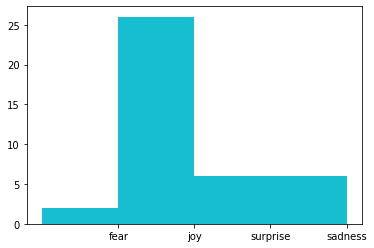

Counter({'joy': 27, 'surprise': 6, 'sadness': 6, 'fear': 2})
Counter({'joy': 27, 'sadness': 7, 'surprise': 6, 'fear': 2})
Counter({'joy': 28, 'sadness': 7, 'surprise': 6, 'fear': 2})
Counter({'joy': 29, 'sadness': 7, 'surprise': 6, 'fear': 2})
Counter({'joy': 30, 'sadness': 7, 'surprise': 6, 'fear': 2})
Counter({'joy': 30, 'sadness': 8, 'surprise': 6, 'fear': 2})
Counter({'joy': 30, 'sadness': 8, 'surprise': 7, 'fear': 2})
Counter({'joy': 30, 'sadness': 9, 'surprise': 7, 'fear': 2})
Counter({'joy': 31, 'sadness': 9, 'surprise': 7, 'fear': 2})
Counter({'joy': 31, 'sadness': 10, 'surprise': 7, 'fear': 2})


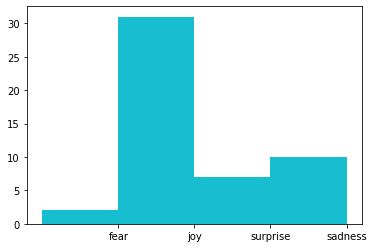

Counter({'joy': 32, 'sadness': 10, 'surprise': 7, 'fear': 2})
Counter({'joy': 32, 'sadness': 11, 'surprise': 7, 'fear': 2})
Counter({'joy': 33, 'sadness': 11, 'surprise': 7, 'fear': 2})
Counter({'joy': 34, 'sadness': 11, 'surprise': 7, 'fear': 2})
Counter({'joy': 35, 'sadness': 11, 'surprise': 7, 'fear': 2})
Counter({'joy': 36, 'sadness': 11, 'surprise': 7, 'fear': 2})
Counter({'joy': 37, 'sadness': 11, 'surprise': 7, 'fear': 2})
Counter({'joy': 38, 'sadness': 11, 'surprise': 7, 'fear': 2})
Counter({'joy': 38, 'sadness': 12, 'surprise': 7, 'fear': 2})
Counter({'joy': 38, 'sadness': 13, 'surprise': 7, 'fear': 2})


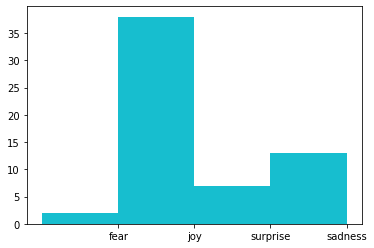

Counter({'joy': 38, 'sadness': 14, 'surprise': 7, 'fear': 2})
Counter({'joy': 39, 'sadness': 14, 'surprise': 7, 'fear': 2})
Counter({'joy': 39, 'sadness': 15, 'surprise': 7, 'fear': 2})
Counter({'joy': 40, 'sadness': 15, 'surprise': 7, 'fear': 2})
Counter({'joy': 41, 'sadness': 15, 'surprise': 7, 'fear': 2})
Counter({'joy': 42, 'sadness': 15, 'surprise': 7, 'fear': 2})
Counter({'joy': 42, 'sadness': 16, 'surprise': 7, 'fear': 2})
Counter({'joy': 43, 'sadness': 16, 'surprise': 7, 'fear': 2})
Counter({'joy': 43, 'sadness': 17, 'surprise': 7, 'fear': 2})
Counter({'joy': 43, 'sadness': 17, 'surprise': 8, 'fear': 2})


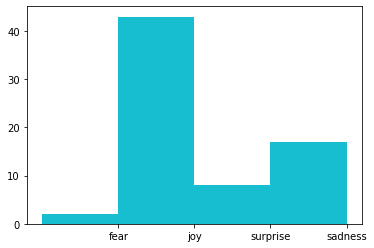

Counter({'joy': 43, 'sadness': 17, 'surprise': 9, 'fear': 2})
Counter({'joy': 44, 'sadness': 17, 'surprise': 9, 'fear': 2})
Counter({'joy': 44, 'sadness': 18, 'surprise': 9, 'fear': 2})
Counter({'joy': 44, 'sadness': 19, 'surprise': 9, 'fear': 2})
Counter({'joy': 45, 'sadness': 19, 'surprise': 9, 'fear': 2})
Counter({'joy': 46, 'sadness': 19, 'surprise': 9, 'fear': 2})
Counter({'joy': 46, 'sadness': 19, 'surprise': 10, 'fear': 2})
Counter({'joy': 47, 'sadness': 19, 'surprise': 10, 'fear': 2})
Counter({'joy': 48, 'sadness': 19, 'surprise': 10, 'fear': 2})
Counter({'joy': 49, 'sadness': 19, 'surprise': 10, 'fear': 2})


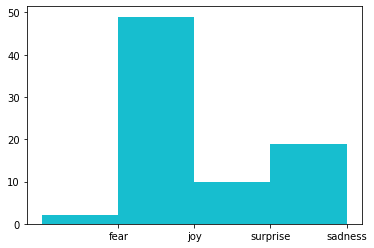

Counter({'joy': 49, 'sadness': 20, 'surprise': 10, 'fear': 2})
Counter({'joy': 50, 'sadness': 20, 'surprise': 10, 'fear': 2})
Counter({'joy': 50, 'sadness': 20, 'surprise': 10, 'fear': 3})
Counter({'joy': 50, 'sadness': 20, 'surprise': 10, 'fear': 4})
Counter({'joy': 50, 'sadness': 21, 'surprise': 10, 'fear': 4})
Counter({'joy': 51, 'sadness': 21, 'surprise': 10, 'fear': 4})
Counter({'joy': 51, 'sadness': 22, 'surprise': 10, 'fear': 4})
Counter({'joy': 52, 'sadness': 22, 'surprise': 10, 'fear': 4})
Counter({'joy': 53, 'sadness': 22, 'surprise': 10, 'fear': 4})
Counter({'joy': 54, 'sadness': 22, 'surprise': 10, 'fear': 4})


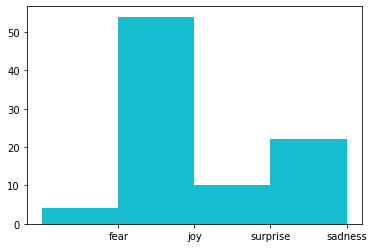

Counter({'joy': 54, 'sadness': 23, 'surprise': 10, 'fear': 4})
Counter({'joy': 54, 'sadness': 23, 'surprise': 11, 'fear': 4})
Counter({'joy': 54, 'sadness': 24, 'surprise': 11, 'fear': 4})
Counter({'joy': 55, 'sadness': 24, 'surprise': 11, 'fear': 4})
Counter({'joy': 55, 'sadness': 24, 'surprise': 12, 'fear': 4})
Counter({'joy': 55, 'sadness': 24, 'surprise': 13, 'fear': 4})
Counter({'joy': 56, 'sadness': 24, 'surprise': 13, 'fear': 4})
Counter({'joy': 57, 'sadness': 24, 'surprise': 13, 'fear': 4})
Counter({'joy': 58, 'sadness': 24, 'surprise': 13, 'fear': 4})


In [ ]:
import time
import os
import re

text_list = []
def follow(thefile):
    '''generator function that yields new lines in a file
    '''
    # seek the end of the file
    thefile.seek(0, os.SEEK_END)
    
    # start infinite loop
    while True:
        # read last line of file
        line = thefile.readline()
        # sleep if file hasn't been updated
        if not line:
            time.sleep(0.1)
            continue
        yield line

    
        
        
if __name__ == '__main__':
    logfile = open("tweets.txt","r")
    loglines = follow(logfile)
    
    # iterate over the generator
    for s in loglines:
        re.sub("\S*\d\S*", "", s).strip()
        tokens = s.strip().split()
        clean_tokens = [t for t in tokens if re.match(r'[^\W\d]*$', t)]
        clean_s = ' '.join(clean_tokens)
        
        if(len(clean_s.split(' '))>1):
            text_list.append(clean_s)
            predict_emotion(text_list)
            